# MD Simulations with Submission System

## Imports

In [1]:
import os

#Analysis
import numpy as np
from matplotlib import pyplot as plt

import pygromos
from pygromos.files.gromos_system import Gromos_System
from pygromos.files.blocks import imd_blocks
from pygromos.data.simulation_parameters_templates import template_emin

## Input files


In [2]:
root_dir = project_dir = os.path.abspath(os.path.dirname(pygromos.__file__)+"/../examples/example_files/MD_Simulation")
root_in_dir = root_dir+"/MD_input"
cnf_path = root_in_dir+"/in_md.cnf"
top_path = root_in_dir + "/in_md.top"
sys_name = "md"


## RUN Emin

In [27]:
from pygromos.hpc_queuing.submission_systems.Submission_Systems import LOCAL as subSystem
from pygromos.simulation_runner.simulation_building_blocks import emin
step_name  = "a_emin"

#External imd_changes:
grom_system = Gromos_System(in_cnf_path=cnf_path, in_top_path=top_path, in_imd_path=template_emin,
                            system_name=sys_name, work_folder=root_in_dir)

grom_system


GROMOS SYSTEM: md
################################################################################
WORKDIR: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input
LAST CHECKPOINT: None
FILES: 
	imd: /home/bschroed/Documents/code/pygromos/pygromos/data/simulation_parameters_templates/emin.imd
	top: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input/in_md.top
	cnf: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input/in_md.cnf
FUTURE PROMISE: False
SYSTEM: 
	PROTEIN:	protein  nresidues: 5 natoms: 71
	Non-LIGANDS:	[]  nmolecules: 0  natoms: 0
	SOLVENT:	SOLV  nmolecules: 930  natoms: 2790



In [28]:
grom_system.generate_posres(residues=["SOLV"], keep_residues=False)


Cnf


In [29]:
grom_system._update_all_file_paths()
grom_system.write_files(posres=True, refpos=True)
grom_system


GROMOS SYSTEM: md
################################################################################
WORKDIR: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input
LAST CHECKPOINT: None
FILES: 
	imd: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input/md.imd
	top: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input/md.top
	cnf: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input/md.cnf
	posres: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input/md.pos
	refpos: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/MD_input/md.rpf
FUTURE PROMISE: False
SYSTEM: 
	PROTEIN:	protein  nresidues: 5 natoms: 71
	Non-LIGANDS:	[]  nmolecules: 0  natoms: 0
	SOLVENT:	SOLV  nmolecules: 930  natoms: 2790



In [30]:
#Some special adaptation
grom_system.imd.WRITETRAJ = imd_blocks.WRITETRAJ()
grom_system.imd.WRITETRAJ.NTWX = 100
grom_system.imd.WRITETRAJ.NTWE = 100
#ADD POSRES HERE

emin_gromos_system, jobID = emin(in_gromos_system=grom_system, project_dir=project_dir,
                          step_name=step_name, submission_system=subSystem(), in_imd_path=None)
emin_gromos_system

################################################################################

a_emin
################################################################################

FOUND RESULT: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/a_emin/analysis/data/a_emin.cnf
 GOING TO SKIPT THIS SUBMISSION!



GROMOS SYSTEM: a_emin
################################################################################
WORKDIR: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/a_emin/input
LAST CHECKPOINT: None
FILES: 
	imd: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/a_emin/input/a_emin.imd
	top: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/a_emin/input/a_emin.top
	cnf: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/a_emin/analysis/data/a_emin.cnf
	posres: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/a_emin/input/a_emin.pos
	refpos: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/a_emin/input/a_emin.rpf
FUTURE PROMISE: False
SYSTEM: 
	PROTEIN:	protein  nresidues: 5 natoms: 71
	Non-LIGANDS:	[]  nmolecules: 0  natoms: 0
	SOLVENT:	SOLV  nmolecules: 930  natoms: 2790



In [31]:
emin_gromos_system.solute_info

solute_info(names=['CL6', 'CL7'], number=2, positions=[6, 7], number_of_atoms=2)

## RUN MD Simulation

In [32]:
from pygromos.simulation_runner.simulation_building_blocks import md

step_name  = "b_md"
emin_gromos_system.refpos=None
emin_gromos_system.posres = None
md_gromos_system, jobID  = md(in_gromos_system=emin_gromos_system, project_dir=project_dir,
                              step_name=step_name, submission_system=subSystem(),
                      equilibration_runs=1, simulation_runs=3)
md_gromos_system


################################################################################

b_md
################################################################################

FOUND RESULT: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/b_md/analysis/data/b_md.cnf
 GOING TO SKIPT THIS SUBMISSION!



GROMOS SYSTEM: b_md
################################################################################
WORKDIR: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/b_md/input
LAST CHECKPOINT: None
FILES: 
	imd: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/b_md/input/b_md.imd
	top: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/b_md/input/b_md.top
	cnf: /home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/b_md/analysis/data/b_md.cnf
FUTURE PROMISE: False
SYSTEM: 
	PROTEIN:	protein  nresidues: 5 natoms: 71
	Non-LIGANDS:	[]  nmolecules: 0  natoms: 0
	SOLVENT:	SOLV  nmolecules: 930  natoms: 2790



## Further Analysis:
Transform the trc into a pdb traj to check it out with pymol :!)

In [4]:
#final analysis dir:
from pygromos.utils import bash

out_ana = project_dir+"/c_ana"
if(not os.path.exists(out_ana)):
    bash.make_folder(out_ana)

'/home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation'

In [5]:
from pygromos.files.trajectory.trc import Trc

in_path=project_dir+"/b_md/analysis/data/b_md.trc.h5"
print(in_path)
trc = Trc(input_value=in_path)
trc.write_pdb(out_ana+"/md_traj.pdb", cnf_file=cnf_path)#grom_system.cnf.path)
trc

/home/bschroed/Documents/code/pygromos/examples/example_files/MD_Simulation/b_md/analysis/data/b_md.trc.h5


Trajectory: 
	Read from hdf save 
	Contains only database
	
Type: 
	Trc
Frames: 	63	 Columns:	2869


In [6]:
from pygromos.files.trajectory.tre import Tre
in_path=project_dir+"/b_md/analysis/data/b_md.tre.h5"

tre = Tre(input_value=in_path)
tre

Trajectory: 
	Read from hdf save 
	Contains only database
	
Type: 
	Tre
Frames: 	64	 Columns:	15


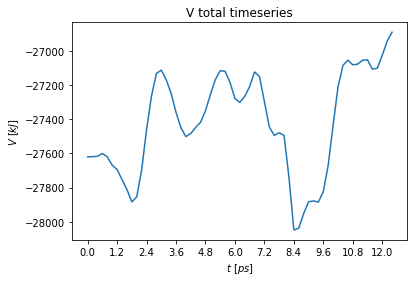

In [7]:

V_tot = np.array(list(map(lambda x: x[2], tre.database.totals)))
step = len(tre.database.TIMESTEP_time)//10

plt.plot(tre.database.TIMESTEP_time, V_tot)
plt.xticks(np.round(list(tre.database.TIMESTEP_time[::step]),2))
plt.xlabel("$t~[ps]$")
plt.ylabel("$V~[kJ]$")
plt.title("V total timeseries")
plt.savefig(out_ana+"/potential_energy_timeseries.png")